# NanoFTIR spectrum quality control

## Load two reference spectra measured on Gold

0.009789888704928052


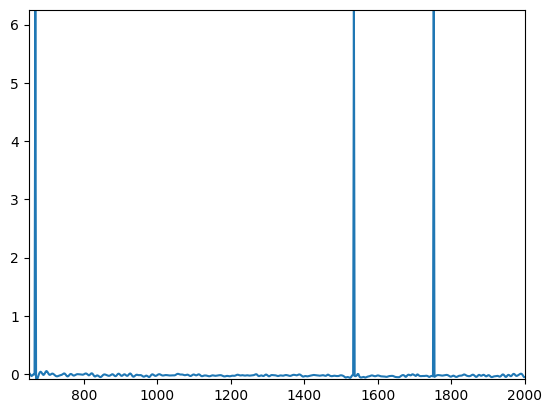

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)
import NeaSpectra as neas

# Choose a measurement file
current_folder = os.getcwd()
file_name1 = 'C:\\Users\\ngerg\\OneDrive\\NanoFTIR\\MeasData\\2022-07-19 192414 NF S SR-TEST-NeaTipFast-Gold-A70-meas1.txt'
file_name2 = 'C:\\Users\\ngerg\\OneDrive\\NanoFTIR\\MeasData\\2022-07-19 192943 NF S SR-TEST-NeaTipFast-Gold-A70-meas2.txt'

s1 = neas.NeaSpectrum()
s1.readNeaSpectrum(file_name1)

s2 = neas.NeaSpectrum()
s2.readNeaSpectrum(file_name2)

selfSpectrum = s1.data["O3A"]/s2.data["O3A"]

wnaxis = s1.data["Wavenumber"]
wnstart = 650
wnstop = 2000
wnstart_idx = np.argmin(abs(wnaxis-wnstart))
wnstop_idx = np.argmin(abs(wnaxis-wnstop))

SNR = np.mean(selfSpectrum[wnstart_idx:wnstop_idx])/np.std(selfSpectrum[wnstart_idx:wnstop_idx])

print(SNR)
plt.plot(wnaxis, selfSpectrum)
ax = plt.gca()
ax.set_xlim([wnstart, wnstop])
ax.set_ylim([min(selfSpectrum[wnstart_idx:wnstop_idx]), max(selfSpectrum[wnstart_idx:wnstop_idx])])
plt.show()